In [1]:
from pathlib import Path
from LyaPlotter.file_types import FilesBase
import numpy as np
from LyaPlotter.sims import CoLoReSim

In [2]:
basedir = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf/nside_2/norsd/0.1_200_41/0.8_0.9/0/')

In [3]:
colore = CoLoReSim(0, '/global/cscratch1/sd/cramirez/QSO_clustering_analysis/CoLoRe_boxes/10x_DESI_box')
rand_file = basedir / '2' / 'Randoms.fits'
rand_full_file = '/global/cscratch1/sd/cramirez/QSO_clustering_analysis/CoLoRe_boxes/10x_DESI_box_rand.drq'

In [4]:
import healpy

In [6]:
data = colore.get_Sources(nside=2)
rand = FilesBase(rand_file)
rand_full = FilesBase(rand_full_file, nside=2)
mask = data.healpixels == healpy.pixelfunc.ring2nest(nside=2, ipix=2)
mask_rand = rand_full.healpixels == healpy.pixelfunc.ring2nest(nside=2, ipix=2)

In [7]:
mask &= data.z > 0.8
mask &= data.z < 0.9

In [8]:
mask_rand &= rand_full.z > 0.8
mask_rand &= rand_full.z < 0.9

In [9]:
print(data.N_obj)
print(rand.N_obj)
print(rand_full.N_obj)
print(mask.sum())
print(mask_rand.sum())

80757308
37237
80757308
37536
37923


In [10]:
data = colore.get_Sources(mask=mask,nside=2)
rand_full = FilesBase(rand_full_file, nside=2, mask=mask_rand)

In [11]:
data.N_obj

37536

In [12]:
rand_full.N_obj

37923

In [13]:
rand.N_obj

37237

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.

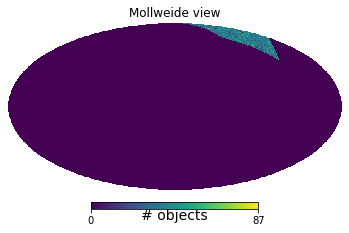

In [14]:
data.plot_footprint(nside=64)

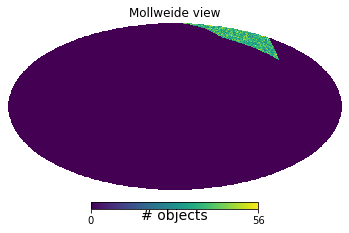

In [15]:
rand.plot_footprint(nside=64)

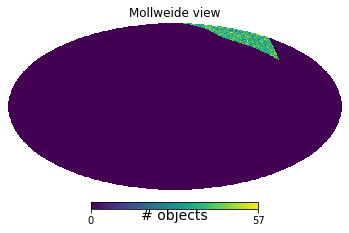

In [16]:
rand_full.plot_footprint(nside=64)

In [21]:
import matplotlib.pyplot as plt

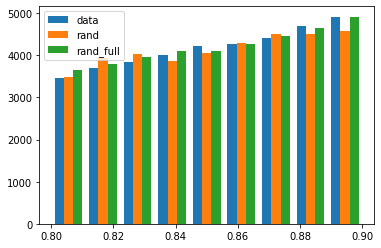

In [25]:
bins = np.linspace(0.8, 0.9, 10)
fig, ax = plt.subplots()
ax.hist([data.z, rand.z, rand_full.z], bins=bins, label=['data', 'rand', 'rand_full'])
ax.legend()

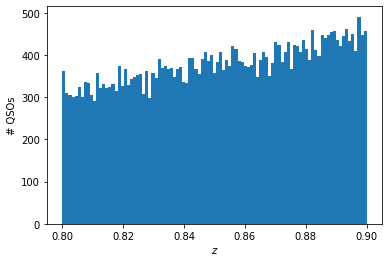

In [17]:
bins = np.linspace(0.8, 0.9, 100)
data.plot_dist(bins=bins)

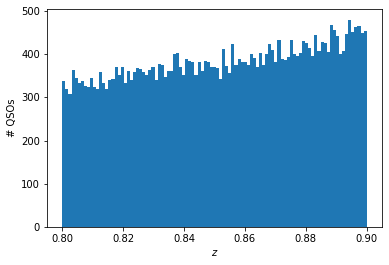

In [18]:
rand_full.plot_dist(bins=bins)

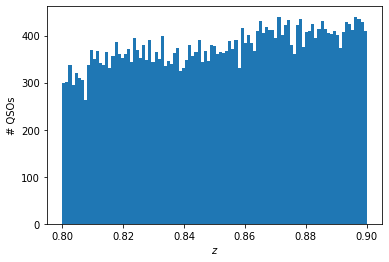

In [19]:
rand.plot_dist(bins=bins)

In [19]:
len(data.RA)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
data.mask.sum()

26176

In [10]:
import LyaPlotter

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy/projaxes.

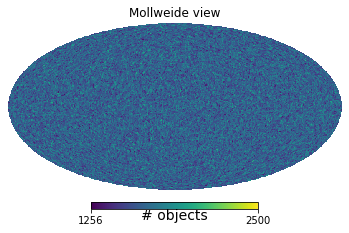

In [9]:
data.plot_footprint()

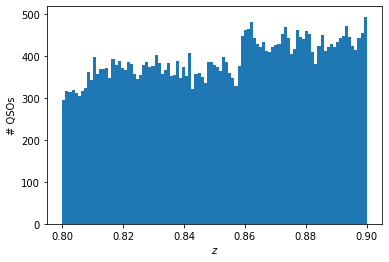

In [12]:
data.plot_dist(bins=np.linspace(0.8, 0.9, 100))

In [14]:
data.N_obj

38802

In [27]:
healpy.pixelfunc.nside2pixarea(2, degrees=True)

859.4366926962348